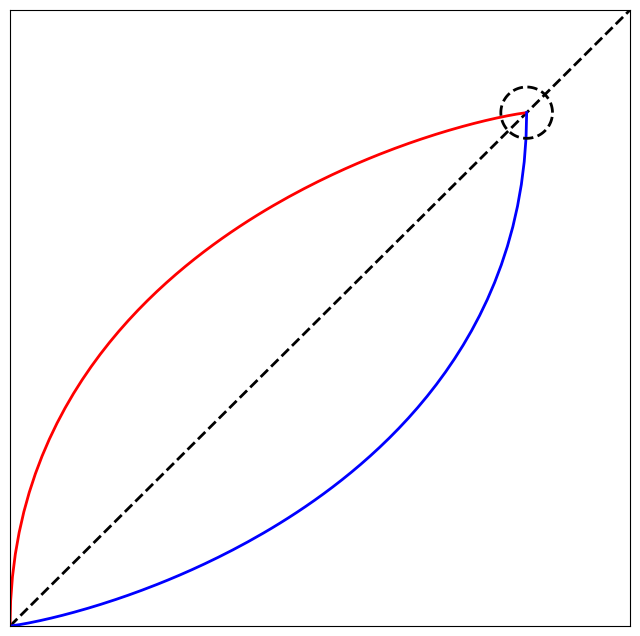

In [57]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Let's correct the background color and add only one arrow on the induction/repression line to show the direction.

n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'gradient'

u_values = np.linspace(0, 1.2, 100)
s_values = np.linspace(0, 1.2, 100)
U, S = np.meshgrid(u_values, s_values)
t = np.linspace(0, 10, 200)
params = [(1, 1, 1), (0, 1, 1)]
initial_conditions = [(0, 0), (1, 1)]

# Adjust the colormap to go from red to white to blue
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # Red -> White -> Blue
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Adjust the scalar field for the color gradient
# The distance from the diagonal line u = s is given by |u - s| / sqrt(2), and we normalize it
distance_to_diagonal = (S - U) / np.sqrt(2)
max_distance = np.max(distance_to_diagonal)
normalized_distance = distance_to_diagonal / max_distance

def rna_velocity_swapped(y, t, alpha, beta, gamma):
    s, u = y
    du_dt = alpha - beta * u
    ds_dt = beta * u - gamma * s
    return [ds_dt, du_dt]

# Clear previous plot and create a new one
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the gradient background with the adjusted colormap
# contour = ax.contourf(S, U, normalized_distance, n_bins, cmap=cm)

# Plot the steady-state line s = gamma * u, which is the diagonal in the spliced vs unspliced space
ax.plot(s_values, s_values, 'k--', linewidth=2)

# Plot the trajectories for the initial conditions (0,0) for induction and (1,1) for repression
for alpha, beta, gamma in params:
    for s0, u0 in initial_conditions:
        Y = odeint(rna_velocity_swapped, [s0, u0], t, args=(alpha, beta, gamma))
        if (u0, s0) == (0, 0):  # Induction initial condition
            line, = ax.plot(Y[:, 0], Y[:, 1], 'r', linewidth=2)
            
        else:  # Repression initial condition
            line, ax.plot(Y[:, 0], Y[:, 1], 'b', linewidth=2)
            

# Set the labels and title
# ax.set_xlabel('Spliced RNA (s)')
# ax.set_ylabel('Unspliced RNA (u)')
# ax.set_title('Phase Plot of RNA Velocity ODEs with Corrected Gradient Background')



center_x, center_y = 1, 1  # Center at (1,1)
radius = 0.05  # Circle radius
theta = np.linspace(0, 2 * np.pi, 100)  # Values from 0 to 2pi for a complete circle

# Circle coordinates
circle_x = center_x + radius * np.cos(theta)
circle_y = center_y + radius * np.sin(theta)

# ... [your existing plotting code] ...

# Plot the circle with dashed line style
ax.plot(circle_x, circle_y, 'k--', linewidth=2)

ax.tick_params(axis='both', which='both', length=0)
plt.xticks([])
plt.yticks([])

# Add arrows to indicate the axis direction
# ax.annotate('', xy=(1.2, 0), xytext=(0, 0), arrowprops=dict(facecolor='black', arrowstyle='simple'))
# ax.annotate('', xy=(0, 1.2), xytext=(0, 0), arrowprops=dict(facecolor='black', arrowstyle='simple'))
# Set axis limits to only show (0, 0) to (1.3, 1.3)
ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)

plt.savefig("my_figure.eps", format='eps',bbox_inches='tight')
plt.show()

In [42]:
import treeswift as tw

In [55]:
tree = tw.read_tree('(dog:2, (elephant:3, horse:6):2)',schema='Newick')

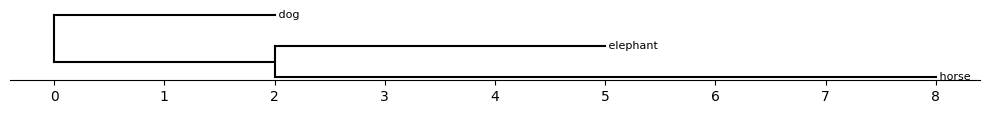

In [56]:
tree.draw(show_labels=True)

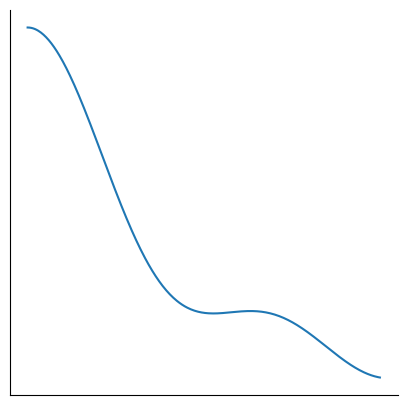

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def potential_energy_gaussian(x, a, mu, sigma, b, c, d):
    gaussian_term = a * np.exp(-(x - mu)**2 / (2 * sigma**2))
    cosine_term = 0.1* np.cos(c * x)
    return gaussian_term + cosine_term + d

# New constants for the Gaussian term
a_gaussian, mu, sigma = 1, 0, 1

# Create an array of positions (x values)
x = np.linspace(0, 4, 400)

V_gaussian = potential_energy_gaussian(x, a_gaussian, mu, sigma, b, c, d)

# Replotting with the Gaussian term
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x, V_gaussian)


# Hiding the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks([])
plt.yticks([])
plt.grid(True)

# plt.legend()
plt.savefig("potential.eps", format='eps',bbox_inches='tight')
plt.show()

/var/folders/js/g7pncpj135j12v52t38tgclh0000gn/T/ipykernel_34395/3071148839.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=branch_df, x='Pseudotime', y='Normalized Expression', hue='Branch', ci='sd', estimator='mean')


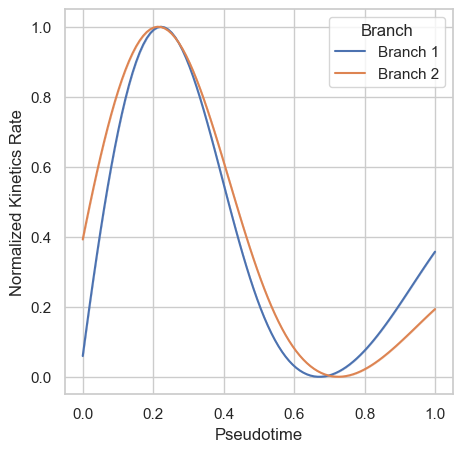

In [93]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set_theme(style="whitegrid")

# Define the number of observations for each pseudotime
num_observations = 5

# Define two smooth functions for the branches before and after the pseudotime point 0.5
def branch_function(pseudotime, branch_type):
    # A smooth transition around pseudotime 0.5 using a sigmoid function to blend the two behaviors
    transition = 1 / (1 + np.exp(-10 * (pseudotime - 0.5)))
    base_expression = np.sin(2 * np.pi * pseudotime) * np.exp(-pseudotime)  # Base smooth function
    deviation = np.random.normal(0, 0.05, size=pseudotime.shape)  # Add some noise
    deviation = 0
    if branch_type == 'increasing':
        # After 0.5, the increasing branch moves upwards smoothly
        return base_expression * (1 - transition) + (base_expression + 0.5 * transition) + deviation
    elif branch_type == 'decreasing':
        # After 0.5, the decreasing branch moves downwards smoothly
        return base_expression * (1 - transition) + (base_expression - 0.5 * transition) + deviation

# Simulate data for two branches
branch_data = []

# Generate pseudotime values from 0 to 1
pseudotime = np.linspace(0, 1, 100)

# Generate the observations for each pseudotime point
for obs in range(num_observations):
    for pt in pseudotime:
        branch_data.append({'Pseudotime': pt, 'Normalized Expression': branch_function(pt, 'increasing'), 'Branch': 'Branch 1'})
        branch_data.append({'Pseudotime': pt, 'Normalized Expression': branch_function(pt, 'decreasing'), 'Branch': 'Branch 2'})

# Convert the list to a DataFrame and normalize the expression
branch_df = pd.DataFrame(branch_data)
branch_df['Normalized Expression'] = branch_df.groupby('Branch')['Normalized Expression'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot using seaborn with confidence intervals
plt.figure(figsize=(5, 5))
sns.lineplot(data=branch_df, x='Pseudotime', y='Normalized Expression', hue='Branch', ci='sd', estimator='mean')

# Set the title and labels for the plot
# plt.title('Kinetics Parameters with Smooth Diverging Branches')
plt.xlabel('Pseudotime')
plt.ylabel('Normalized Kinetics Rate')

# Show the plot
plt.show()



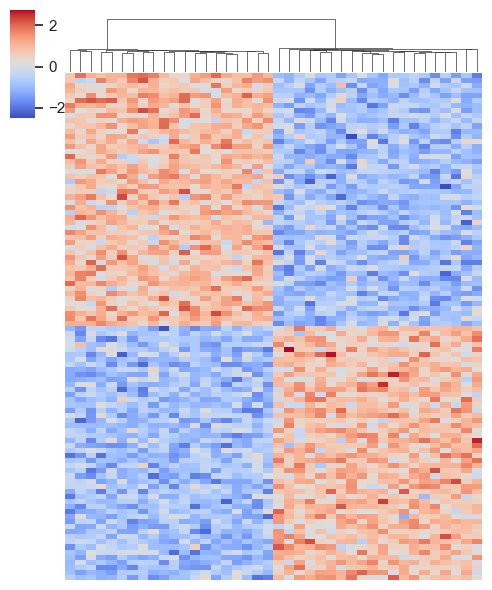

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Number of genes and samples per group
num_genes = 100
num_samples_per_group = 20

# Simulating specific expression patterns
# First 50 genes with higher expression in the control group
control_group_high = np.random.normal(loc=12, scale=2, size=(num_genes // 2, num_samples_per_group))
treatment_group_low = np.random.normal(loc=6, scale=2, size=(num_genes // 2, num_samples_per_group))

# Second 50 genes with higher expression in the treatment group
control_group_low = np.random.normal(loc=6, scale=2, size=(num_genes // 2, num_samples_per_group))
treatment_group_high = np.random.normal(loc=12, scale=2, size=(num_genes // 2, num_samples_per_group))

# Combining the data
control_group = np.vstack((control_group_high, control_group_low))
treatment_group = np.vstack((treatment_group_low, treatment_group_high))

# Combining and Z-normalizing the data
combined_data = np.hstack((control_group, treatment_group))
combined_data_z_normalized = (combined_data - combined_data.mean(axis=0, keepdims=True)) / combined_data.std(axis=0, keepdims=True)

# Gene and sample labels
gene_labels = [f"Gene_{i+1}" for i in range(num_genes)]
group_labels = ['Control'] * num_samples_per_group + ['Treatment'] * num_samples_per_group

# Convert to DataFrame
df_normalized = pd.DataFrame(combined_data_z_normalized, index=gene_labels, columns=group_labels)

# Plotting the clustered heatmap
sns.clustermap(df_normalized, cmap='coolwarm',row_cluster=False, figsize=(5, 6), 
               xticklabels=False, yticklabels=False, dendrogram_ratio=0.1)
plt.savefig("DE.eps", format='eps',bbox_inches='tight')
plt.show()


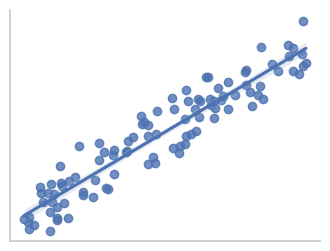

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Simulating Data
# Simulating two variables (x and y) with a linear relationship
np.random.seed(0)  # For reproducibility
x = np.random.rand(100)  # 100 random values for x
y = 2 * x + np.random.normal(0, 0.2, 100)  # y is linearly dependent on x with some noise

# Creating a DataFrame for easier plotting
data = pd.DataFrame({'X': x, 'Y': y})

# Step 2 and 3: Plotting Scatter Plot and Linear Regression Line
plt.figure(figsize=(4, 3))
# sns.scatterplot(x='X', y='Y', data=data, color='blue', label='Data points')
sns.regplot(x='X', y='Y', data=data)
ax = plt.gca()  # Get the current axes instance
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
# plt.title("Correlation Plot with Linear Regression Line")
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.savefig("association.eps", format='pdf',bbox_inches='tight')
plt.show()


In [ ]:
227, 170, 149